In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_label_binary.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Text,label
0,0,0,2023-02-06 23:59:56+00:00,Gila BPOM bener deh ini PR besar buat kalian h...,0
1,1,1,2023-02-06 23:59:53+00:00,kontol,1
2,2,2,2023-02-06 23:59:52+00:00,Iya tai,0
3,3,3,2023-02-06 23:59:47+00:00,enak aja gila,0
4,4,4,2023-02-06 23:59:44+00:00,Haechan lagi gila gilaan gantengnya ya pusing dah,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    995 non-null    int64 
 1   Unnamed: 0.1  995 non-null    int64 
 2   Datetime      995 non-null    object
 3   Text          995 non-null    object
 4   label         995 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 39.0+ KB


In [6]:
df.drop("Unnamed: 0",inplace= True,axis = 1)

In [7]:
df.drop("Unnamed: 0.1",inplace= True,axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  995 non-null    object
 1   Text      995 non-null    object
 2   label     995 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.4+ KB


In [9]:
import urllib.request

url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'
file_name = 'cc.id.300.vec.gz'

urllib.request.urlretrieve(url, file_name)


('cc.id.300.vec.gz', <http.client.HTTPMessage at 0x7fd800464820>)

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# Perform feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Convert labels to numpy array
y = np.array(df['label'])

# Preprocessing
# We don't need to do any further preprocessing since TF-IDF vectorizer takes care of it

# Convert sparse matrix to numpy array
X = X.toarray()

# Extract features
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN+RNN model
input_layer = Input(shape=(100,))
embedding_layer = Embedding(max_features, 128)(input_layer)
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
lstm_layer = LSTM(128)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/50
13/13 [==============================] - 9s 307ms/step - loss: 0.6755 - accuracy: 0.5917 - val_loss: 0.6588 - val_accuracy: 0.5779
Epoch 2/50
13/13 [==============================] - 3s 226ms/step - loss: 0.6121 - accuracy: 0.6106 - val_loss: 0.5969 - val_accuracy: 0.6583
Epoch 3/50
13/13 [==============================] - 2s 138ms/step - loss: 0.5105 - accuracy: 0.7462 - val_loss: 0.5698 - val_accuracy: 0.7437
Epoch 4/50
13/13 [==============================] - 2s 128ms/step - loss: 0.3994 - accuracy: 0.8342 - val_loss: 0.5277 - val_accuracy: 0.7638
Epoch 5/50
13/13 [==============================] - 2s 123ms/step - loss: 0.2870 - accuracy: 0.8832 - val_loss: 0.6394 - val_accuracy: 0.7538
Epoch 6/50
13/13 [==============================] - 2s 136ms/step - loss: 0.1875 - accuracy: 0.9296 - val_loss: 0.6452 - val_accuracy: 0.7688
Epoch 7/50
13/13 [==============================] - 1s 81ms/step - loss: 0.1126 - accuracy: 0.9598 - val_loss: 0.7238 - val_accuracy: 0.7839
Epoch 8

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import gensim
from tqdm import tqdm


# Perform feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Convert labels to numpy array
y = np.array(df['label'])

# Preprocessing
# We don't need to do any further preprocessing since TF-IDF vectorizer takes care of it

# Convert sparse matrix to numpy array
X = X.toarray()

# Extract features
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
X = pad_sequences(sequences, maxlen=100)

# Feature expansion
feature_ef = vectorizer.get_feature_names()
model_ef = gensim.models.KeyedVectors.load_word2vec_format('/content/cc.id.300.vec.gz')

def feature_expansion(df, feature, max_distance=0.6):
    for col in tqdm(df.columns): #loop per kolom
        if col not in feature:
            try: 
                sim_words = model_ef.similar_by_word(col, topn=10) #mencari Similarity
            except:
                sim_words = []
            for sim_word, sim_score in sim_words:
                if sim_word in feature and sim_score >= max_distance:
                    # check if the similar word has a non-zero value in the DataFrame
                    # and the column is not already assigned a non-zero value
                    if df[sim_word].any() and not df[col].any():
                        # assign the non-zero value of the similar word to the current column
                        df.loc[df[sim_word] != 0, col] = df[sim_word]
    return df

df = feature_expansion(df, feature_ef)

vectorizer_ef = TfidfVectorizer(vocabulary=feature_ef)
X_ef = vectorizer_ef.fit_transform(df['Text'])

X_ef = X_ef.toarray()
X = np.concatenate([X, X_ef], axis=1)

# Split the data into training and testing sets
X_train, Ex_X_test, y_train,Ex_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN+RNN model
input_layer = Input(shape=(X.shape[1],))
embedding_layer = Embedding(X.shape[1], 128)(input_layer)
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
lstm_layer = LSTM(128)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

ex_model = Model(inputs=input_layer, outputs=output_layer)
ex_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
ex_history = ex_model.fit(X_train, y_train, validation_data=(Ex_X_test, Ex_y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = ex_model.evaluate(Ex_X_test, Ex_y_test, verbose=False)
print(f'Test accuracy: {accuracy:.4f}')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 3/3 [00:08<00:00,  2.73s/it]


Epoch 1/50
13/13 [==============================] - 7s 318ms/step - loss: 0.6750 - accuracy: 0.5854 - val_loss: 0.6849 - val_accuracy: 0.5779
Epoch 2/50
13/13 [==============================] - 3s 236ms/step - loss: 0.6698 - accuracy: 0.6106 - val_loss: 0.6846 - val_accuracy: 0.5779
Epoch 3/50
13/13 [==============================] - 4s 298ms/step - loss: 0.6705 - accuracy: 0.6106 - val_loss: 0.6810 - val_accuracy: 0.5779
Epoch 4/50
13/13 [==============================] - 3s 211ms/step - loss: 0.6764 - accuracy: 0.6106 - val_loss: 0.6821 - val_accuracy: 0.5779
Epoch 5/50
13/13 [==============================] - 3s 222ms/step - loss: 0.6694 - accuracy: 0.6106 - val_loss: 0.6906 - val_accuracy: 0.5779
Epoch 6/50
13/13 [==============================] - 3s 235ms/step - loss: 0.6702 - accuracy: 0.6106 - val_loss: 0.6822 - val_accuracy: 0.5779
Epoch 7/50
13/13 [==============================] - 4s 298ms/step - loss: 0.6693 - accuracy: 0.6106 - val_loss: 0.6822 - val_accuracy: 0.5779
Epoch 

In [12]:
from sklearn.metrics import confusion_matrix

# Predict using the without expanded feature model
y_pred_1 = model.predict(X_test)
y_pred_1 = (y_pred_1 > 0.5).astype(int)

# Predict using the with expanded feature model
y_pred_2 = ex_model.predict(Ex_X_test)
y_pred_2 = (y_pred_2 > 0.5).astype(int)

# Generate the confusion matrices for both models
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(Ex_y_test, y_pred_2)

print("Confusion matrix for without expanded feature model:\n", cm_1)
print("Confusion matrix for with expanded feature model:\n", cm_2)


7/7 [==============================] - 1s 33ms/step
Confusion matrix for without expanded feature model:
 [[103  12]
 [ 28  56]]
Confusion matrix for with expanded feature model:
 [[115   0]
 [ 84   0]]


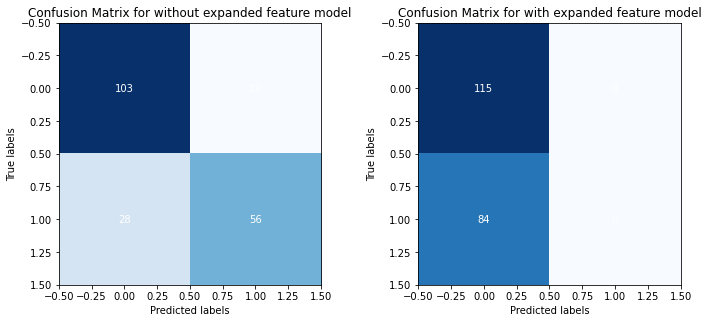

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for model 1
ax[0].imshow(cm_1, cmap='Blues')
ax[0].set_title('Confusion Matrix for without expanded feature model')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
for i in range(cm_1.shape[0]):
    for j in range(cm_1.shape[1]):
        ax[0].text(j, i, cm_1[i, j], ha='center', va='center', color='white')

# Plot confusion matrix for model 2
ax[1].imshow(cm_2, cmap='Blues')
ax[1].set_title('Confusion Matrix for with expanded feature model')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        ax[1].text(j, i, cm_2[i, j], ha='center', va='center', color='white')

plt.tight_layout()
plt.show()
